<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Общий-анализ-по-месяцам" data-toc-modified-id="Общий-анализ-по-месяцам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общий анализ по месяцам</a></span></li><li><span><a href="#Анализ-данных-по-тренду-и-сезоности" data-toc-modified-id="Анализ-данных-по-тренду-и-сезоности-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ данных по тренду и сезоности</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-модели" data-toc-modified-id="Подготовка-данных-для-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных для модели</a></span></li><li><span><a href="#Обучение-и-выбор-лучшей-модели" data-toc-modified-id="Обучение-и-выбор-лучшей-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и выбор лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Модель-леса" data-toc-modified-id="Модель-леса-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель леса</a></span></li><li><span><a href="#Модель-ЛГБМ" data-toc-modified-id="Модель-ЛГБМ-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель ЛГБМ</a></span></li><li><span><a href="#Модель-кота" data-toc-modified-id="Модель-кота-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель кота</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Тестируем-модель-кота" data-toc-modified-id="Тестируем-модель-кота-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестируем модель кота</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Нужно построить модель для такого предсказания.
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

## Подготовка

### Загрузка библиотек

In [1]:
!pip install lightgbm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

### Загрузка и подготовка данных

In [2]:
try:
    df = pd.read_csv('F:\\project\\taxi_product\\taxi.csv', index_col=[0], parse_dates=[0])
except:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
df.sort_index(inplace=True)
print(df.index.is_monotonic)

True


### Общий вывод

Видим, что данные у нас с марта 2018 по август 2018. Пропусков в данных нет. Данные находятся в хронологическом порядке

## Анализ

### Общий анализ по месяцам

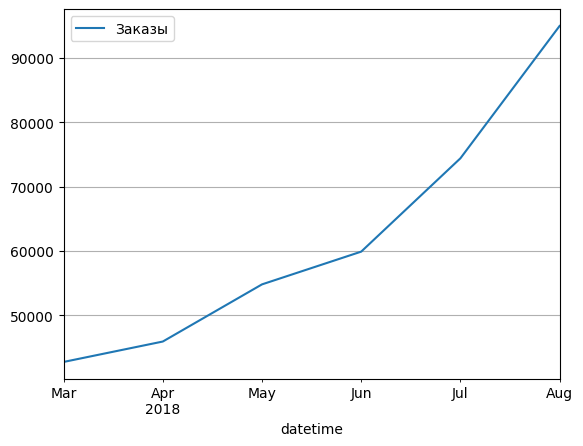

In [6]:
df.resample('1M').sum().plot(grid=True, legend=['Заказы'])
plt.legend(['Заказы']);

Видим, что каждый месяц количество заказов в сервесе ростет

### Анализ данных по тренду и сезоности

In [7]:
df = df.resample('1H').sum()
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [8]:
decomposed = seasonal_decompose(df)

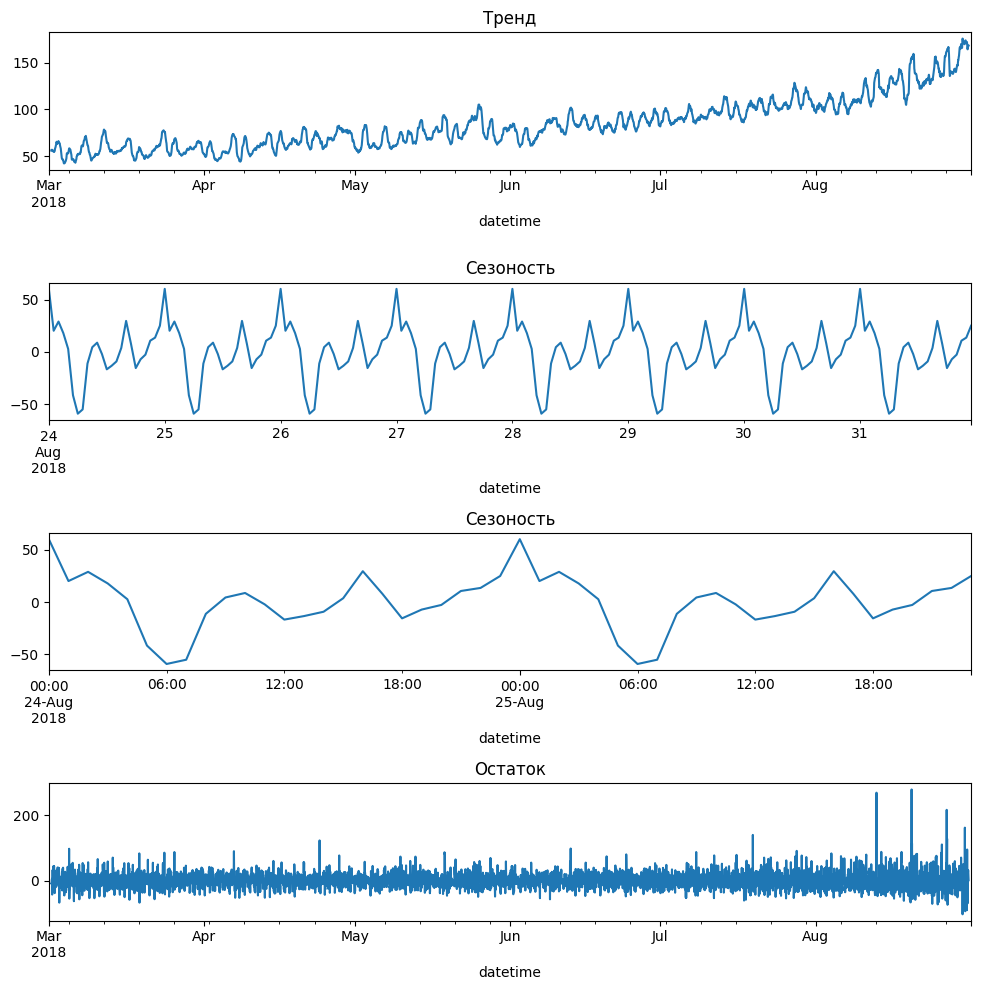

In [9]:
plt.figure(figsize=(10, 10))

plt.subplot(411)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(412)
decomposed.seasonal['2018-08-24':'2018-08-31'].plot(ax=plt.gca())
plt.title('Сезоность')

plt.subplot(413)
decomposed.seasonal['2018-08-24':'2018-08-25'].plot(ax=plt.gca())
plt.title('Сезоность')

plt.subplot(414)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остаток')
plt.tight_layout();

По графикам видим, что тренд восходящий. По сезоности мы видим, что пик заказов приходится на 12 часов ночи, а спад на 6 часов утра

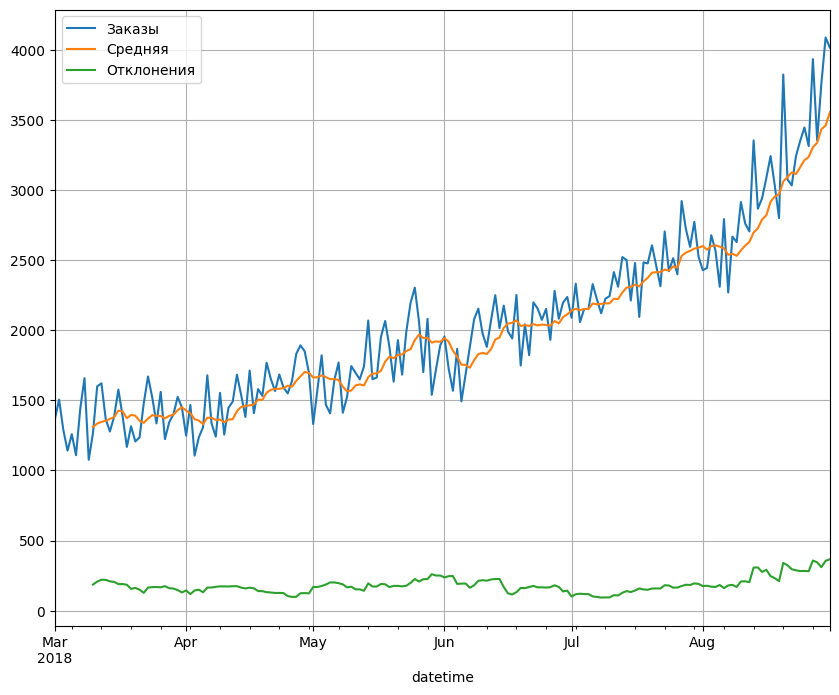

In [10]:
df_table = df.resample('1D').sum()
df_table['mean'] = df_table['num_orders'].rolling(10).mean()
df_table['std'] = df_table['num_orders'].rolling(10).std()
plt.figure(figsize=(10, 8));
df_table.plot(ax=plt.gca(), grid=True);
plt.legend(['Заказы', 'Средняя', 'Отклонения']);

### Общий вывод

Из анализа данных мы видим, что заказы с каждым месяцем у сервиса ростут. Наиболее востребовательно такси в 12 часов ночи, что логично, транспорт перестает ездить и люди обращаются к сервису. В 6 утра наоборот идет большой спад. Это так же можно объяснить, что начинает ездить транспорт и люди могут уехать на нем. Так же видии, что данные не стационарны. Не стационарные данные предсказать сложнее.

## Обучение

### Подготовка данных для модели

In [11]:
def rmse(target, predict):
    rmse = ((mean_squared_error(target, predict))**0.5).round(2)
    return rmse
    
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [12]:
def make_features(df, max_lag, rolling_mean_size):
    df_mf = df.copy()
    df_mf['day'] = df_mf.index.day
    df_mf['dayofweek'] = df_mf.index.dayofweek
    df_mf['hour'] = df_mf.index.hour
    
    for lag in range(1, max_lag + 1):
        df_mf['lag_{}'.format(lag)] = df_mf['num_orders'].shift(lag)

    df_mf['rolling_mean'] = df_mf['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return df_mf

df_mf = make_features(df, 10, 10)

In [15]:
df_mf.dropna(inplace=True)
df_mf.head()

,num_orders,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
datetime,,,,,,,,,,,,,,,
2018-03-01 10:00:00,64,1,3,10,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,52.5
2018-03-01 11:00:00,96,1,3,11,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,46.5
2018-03-01 12:00:00,30,1,3,12,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,47.6
2018-03-01 13:00:00,32,1,3,13,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,43.5
2018-03-01 14:00:00,48,1,3,14,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,40.1


In [16]:
features = df_mf.drop('num_orders', axis=1)
target = df_mf['num_orders']

In [17]:
features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=.1, shuffle=False, random_state=12345)
print('Размер тренировочной выборки:', features_train.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер тренировочной выборки: (3965, 14)
Размер тестовой выборки: (441, 14)


### Обучение и выбор лучшей модели

#### Модель леса

In [18]:
tscv = TimeSeriesSplit(n_splits=2)

In [19]:
parametrs = {'n_estimators' : range (10, 150, 10),
            'max_depth' : range (1, 10, 2)}

In [20]:
rfr = RandomForestRegressor()
grid_rfr = GridSearchCV(rfr, param_grid = parametrs, scoring = rmse_scorer, cv=tscv)
grid_rfr.fit(features_train, target_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10, 2),
                         'n_estimators': range(10, 150, 10)},
             scoring=make_scorer(rmse, greater_is_better=False))

In [21]:
print('Лучшие параметры леса:', grid_rfr.best_params_)
print('Лучший RMSE леса:', grid_rfr.best_score_)

Лучшие параметры леса: {'max_depth': 9, 'n_estimators': 90}
Лучший RMSE леса: -29.155


#### Модель ЛГБМ

In [22]:
parametrs_lgbm = {'n_estimators': range(50, 200, 50),
            'max_depth': range(1, 16, 4)}

In [23]:
lgbm = LGBMRegressor()
grid_lgbm = GridSearchCV(lgbm, param_grid = parametrs_lgbm, scoring = rmse_scorer, cv=tscv)
grid_lgbm.fit(features_train, target_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'max_depth': range(1, 16, 4),
                         'n_estimators': range(50, 200, 50)},
             scoring=make_scorer(rmse, greater_is_better=False))

In [24]:
print('Лучшие параметры ЛГБМ:', grid_lgbm.best_params_)
print('Лучший RMSE ЛГБМ:', grid_lgbm.best_score_)

Лучшие параметры ЛГБМ: {'max_depth': 5, 'n_estimators': 100}
Лучший RMSE ЛГБМ: -28.825


#### Модель кота

In [25]:
parametrs_cb = {'max_depth': range (1, 16, 4),
            'iterations' : range (50, 200, 50)}

In [26]:
cb = CatBoostRegressor()
grid_cb = GridSearchCV(cb, param_grid = parametrs_cb, scoring = rmse_scorer, cv=tscv)
grid_cb.fit(features_train, target_train, verbose=50)

Learning rate set to 0.488791
0:	learn: 28.2962618	total: 140ms	remaining: 6.88s
49:	learn: 19.5573135	total: 179ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 31.0080800	total: 1.33ms	remaining: 65.1ms
49:	learn: 22.0909646	total: 49.2ms	remaining: 0us
Learning rate set to 0.488791
0:	learn: 24.7614080	total: 4.62ms	remaining: 226ms
49:	learn: 11.9308425	total: 160ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 26.8876792	total: 3.73ms	remaining: 183ms
49:	learn: 15.2621698	total: 172ms	remaining: 0us
Learning rate set to 0.488791
0:	learn: 24.3775777	total: 25ms	remaining: 1.22s
49:	learn: 4.7717470	total: 1.09s	remaining: 0us
Learning rate set to 0.5
0:	learn: 26.5448595	total: 25ms	remaining: 1.23s
49:	learn: 8.6752905	total: 1.19s	remaining: 0us
Learning rate set to 0.488791
0:	learn: 24.7840529	total: 459ms	remaining: 22.5s
49:	learn: 1.1535521	total: 21.9s	remaining: 0us
Learning rate set to 0.5
0:	learn: 26.9556122	total: 609ms	remaining: 29.8s
49:	learn: 2.9761905	t

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x000001E768B1A2B0>,
             param_grid={'iterations': range(50, 200, 50),
                         'max_depth': range(1, 16, 4)},
             scoring=make_scorer(rmse, greater_is_better=False))

In [27]:
print('Лучшие параметры кота:', grid_cb.best_params_)
print('Лучший RMSE кота:', grid_cb.best_score_)

Лучшие параметры кота: {'iterations': 150, 'max_depth': 5}
Лучший RMSE кота: -28.915


### Общий вывод

Протестировав 3 модели, наилучшим образом себя показала модель кота. Ее RMSE составила 25.66 с параметрами количество итераций 150 и глубиной 5. Хуже себя показала модель леса ее RMSE составило 26.6. Тест будем проводить на модели кота.

## Тестирование

### Тестируем модель кота

In [28]:
lgbm = LGBMRegressor(max_depth=9, n_estimators=50, random_state=12345)
lgbm.fit(features_train, target_train)
predict_test = lgbm.predict(features_test)

In [29]:
rmse_lgbm=(mean_squared_error(target_test, predict_test))**0.5
print('RMSE модели кота:', rmse_lgbm.round(2))

RMSE модели кота: 45.62


### Проверка на адекватность

In [30]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(features_train, target_train)
dummy_predict = dummy_regr.predict(features_test)
rmse_dummy=(mean_squared_error(target_test, dummy_predict))**0.5
print('RMSE модели со средними значениями:', rmse_dummy.round(2))

RMSE модели со средними значениями: 84.78


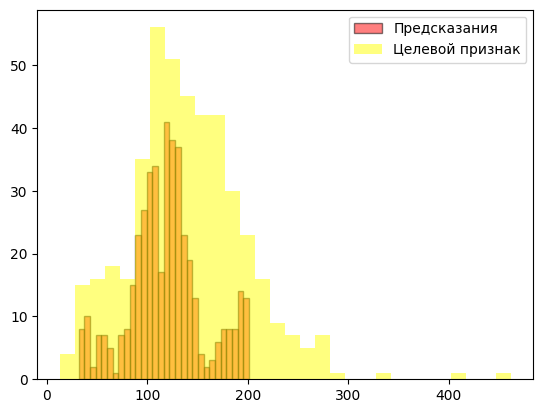

In [60]:
plt.hist(predict_test, label='Предсказания', alpha=.5, edgecolor='black', color='red', bins=30)
plt.hist(target_test, label='Целевой признак', alpha=.5, color='yellow', bins=30)
plt.legend()
plt.show()

## Общий вывод

**В ходе исследования**

1. Загрузил все данные, проверил их
2. Проанализировал данные, выявили тренд, выявил сезоность.
3. Подготовил данные для моделей
4. Обучил 3 модели, нашел лучшую
5. Протестировал лучшую модель
6. Проверил модель на адекватность

**Из исследования получены результаты:**

1. Определил, что данные были за пол года, проверили их на хронологию
2. Из исследования мы видим, что заказы с каждым месяцем ростут, о чем можно сделать вывод о восходящем тренде. Определили, что наибольшая популярность такси в 12 часов ночи. В то время 6 часов утра наименее популярное время для заказа такси. Данные нестационарны, так как изменяются со временем.
3. Обучил 3 модели:
- Модель леса с параметрами количеством деревьев 40 и глубиной 9, показала себя наихудшим образом с RMSE 29.2
- Модель ЛГБМ дала лучший результать. RMSE 28.8 с параметрами итераций 100 и глубиной 5.
- Модель кота показала средние результаты с параметром RMSE 28.9. Количество итераций лучшей модели 150 и глубина 5.
4. Проверка лучшей модели кота на тестовой выборки дало показатели RMSE 45.6. Эти показатели в меньше порогового показателя в 48.
5. При проверке модели на адекватность, когда за предсказания берутся средние показания, модель со средними показателями дало значение 84.8. Этот показатель почти в 2 раза выше, чем показатель у лучшей модели.

**Общие рекомендации**

Объем данных незначителен, при расширении данных и увеличении признаков, предсказания модели можно увеличить. Так же данные были за 6 месяцев. Если данных было бы больше (именно временного периода), то так же можно было бы определить сезоность по времени года.